In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/jordonez/Desktop/Brainstation/CapstoneRepo/data/checkpoint5.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [5]:
# Set default aesthetics for seaborn
sns.set(style="whitegrid")

# Summary Statistics
print(df.describe())

       median_sale_price  median_list_price   median_ppsf  median_list_ppsf  \
count       4.529592e+06       4.529592e+06  4.529592e+06      4.529592e+06   
mean        2.387273e+05       2.664266e+05  1.365971e+02      1.499583e+02   
std         1.979347e+05       2.187787e+05  1.162793e+02      2.238964e+02   
min         1.480000e+01       4.940000e+02  0.000000e+00      0.000000e+00   
25%         1.087700e+05       1.305360e+05  6.907000e+01      7.869000e+01   
50%         1.803590e+05       2.067000e+05  1.063900e+02      1.165200e+02   
75%         3.030618e+05       3.297030e+05  1.696700e+02      1.802800e+02   
max         1.370925e+06       3.254070e+06  1.620572e+04      6.562700e+04   

         homes_sold     inventory  months_of_supply    median_dom  \
count  4.529592e+06  4.529592e+06      4.529592e+06  4.529592e+06   
mean   1.178471e+01  3.687788e+01      3.776697e+00  8.009395e+01   
std    2.026396e+01  6.186655e+01      2.905825e+00  8.494433e+01   
min    1.000

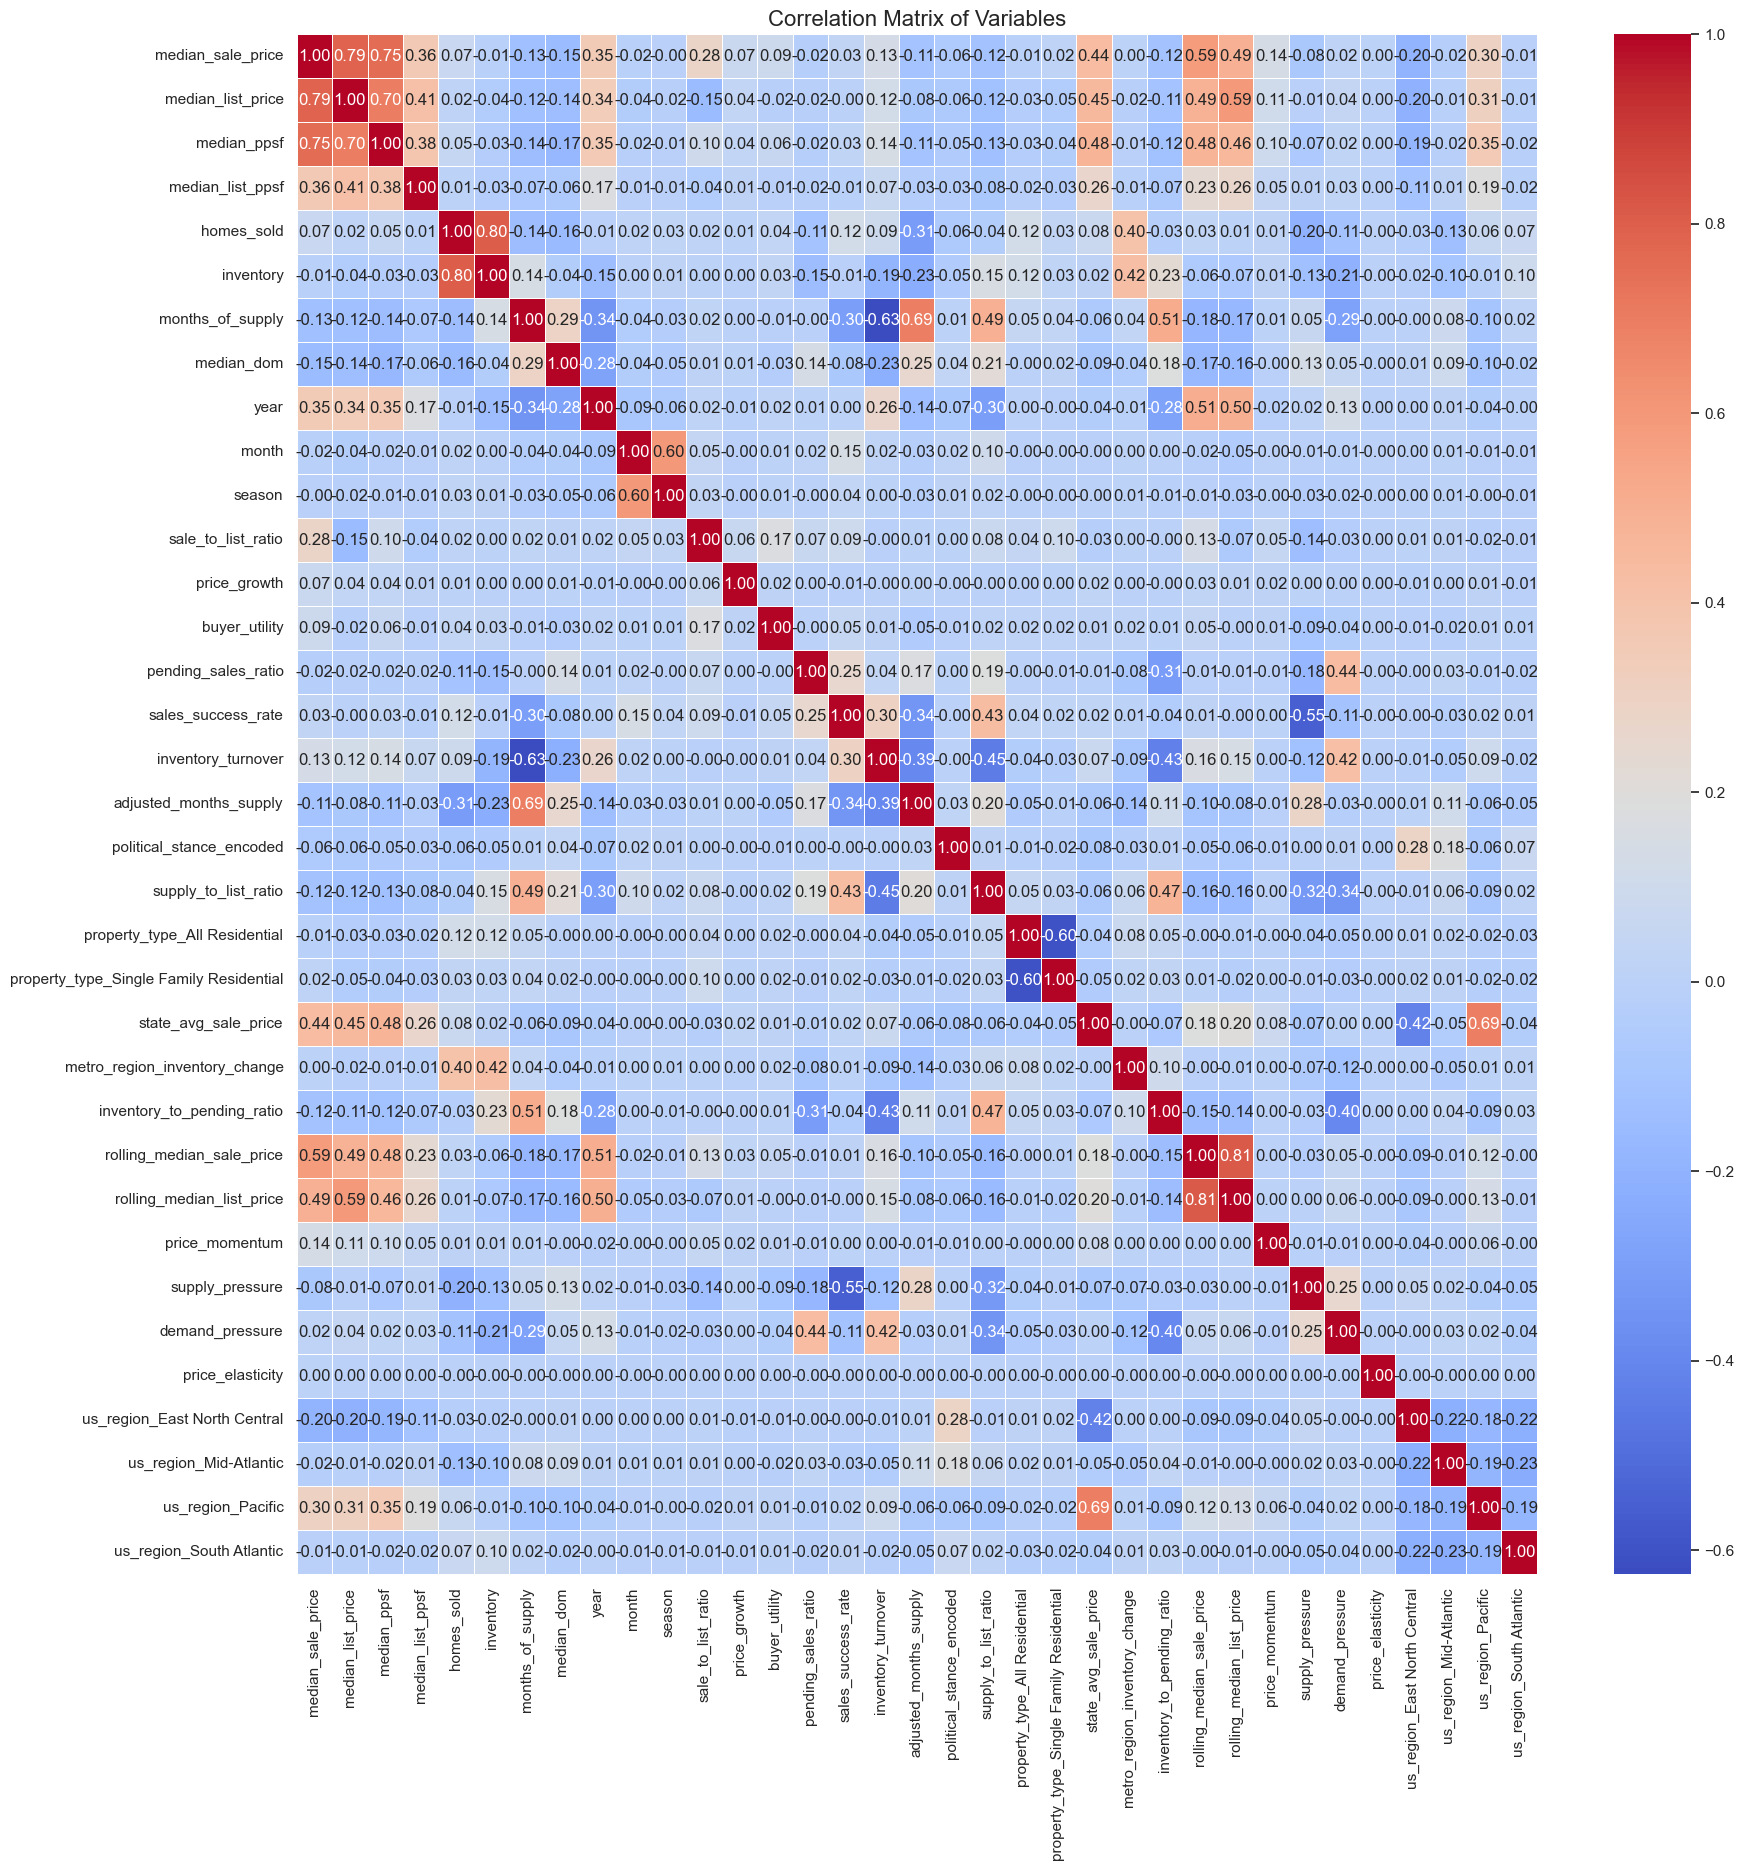

In [8]:
# Correlation Matrix (to find relationships between numerical variables)
plt.figure(figsize=(20, 20))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Variables", fontsize=16)
plt.savefig("/Users/jordonez/Desktop/Brainstation/CapstoneRepo/src/images/correlations.png") 
plt.show()

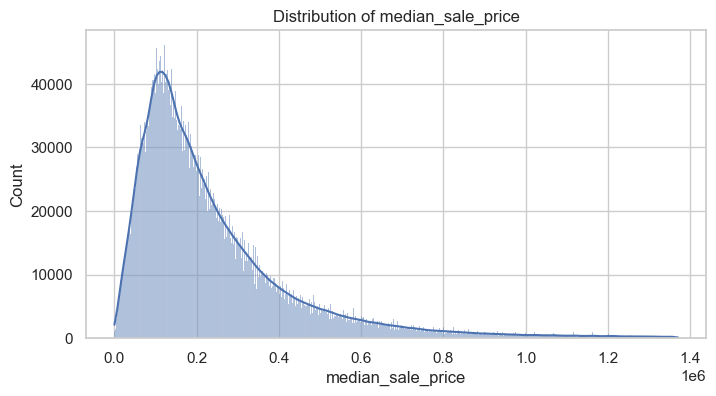

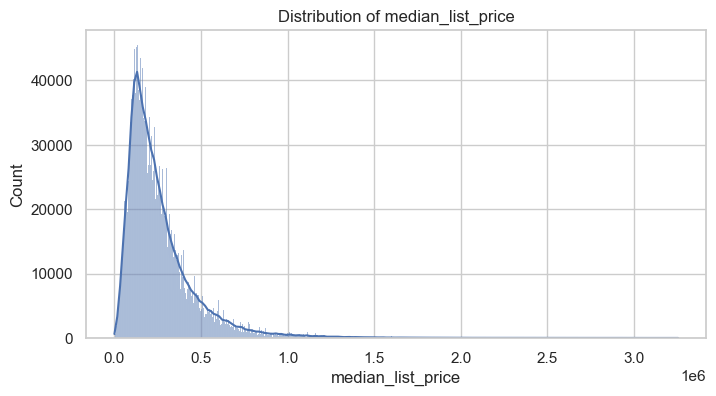

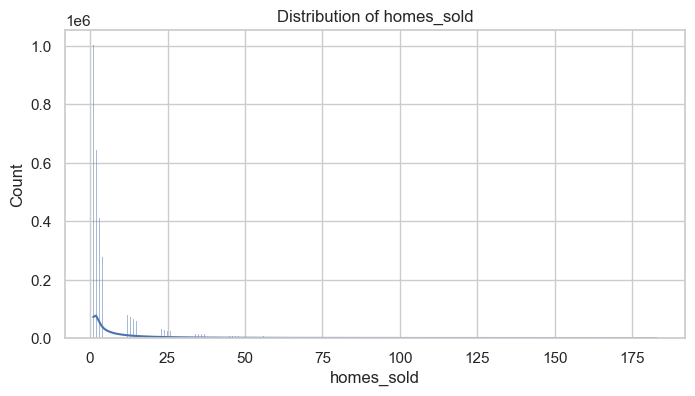

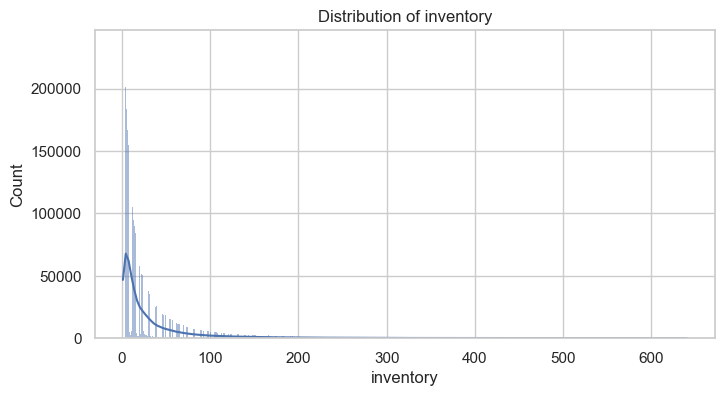

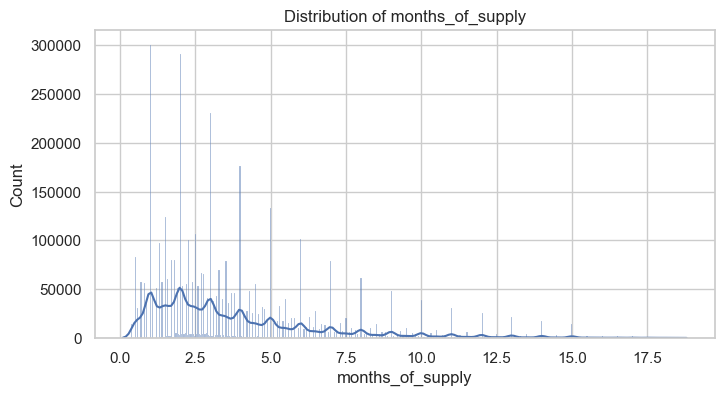

In [13]:
# Distribution Plots for Key Numerical Columns
numerical_columns = ['median_sale_price', 'median_list_price', 
                     'homes_sold', 'inventory', 'months_of_supply']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

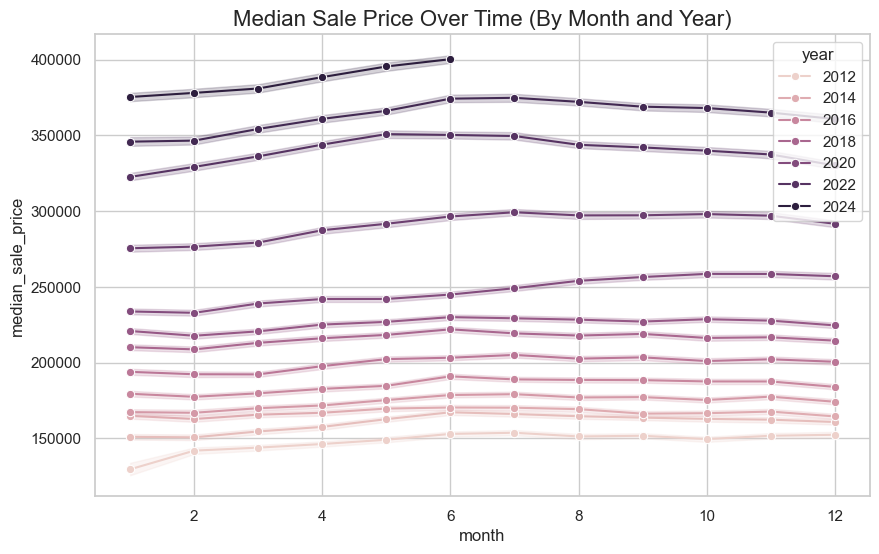

In [14]:
# Median Sale Price over Time (Year and Month)
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='median_sale_price', hue='year', data=df, marker='o')
plt.title("Median Sale Price Over Time (By Month and Year)", fontsize=16)
plt.show()

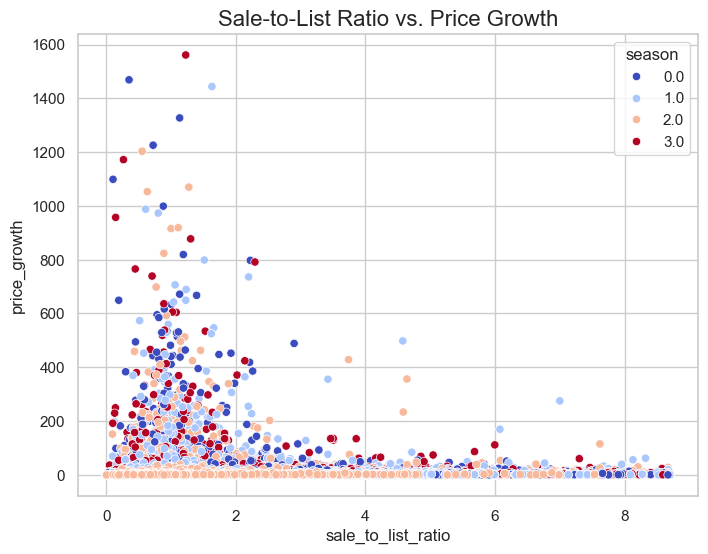

In [17]:
# Scatter Plot of Sale-to-List Ratio vs. Price Growth
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sale_to_list_ratio', y='price_growth', data=df, hue='season', palette='coolwarm')
plt.title("Sale-to-List Ratio vs. Price Growth", fontsize=16)
plt.show()

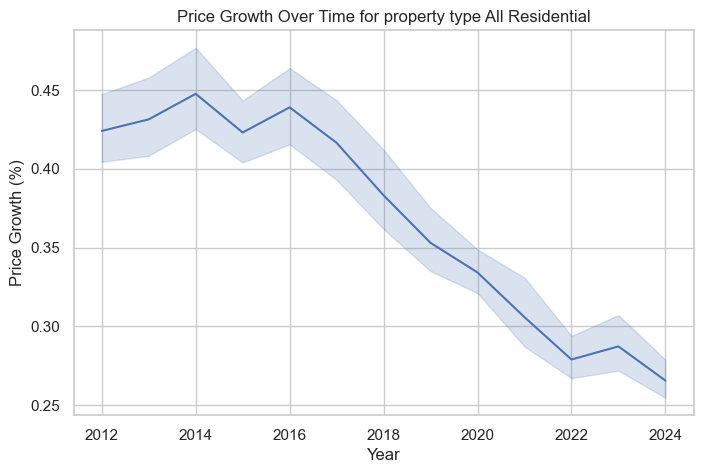

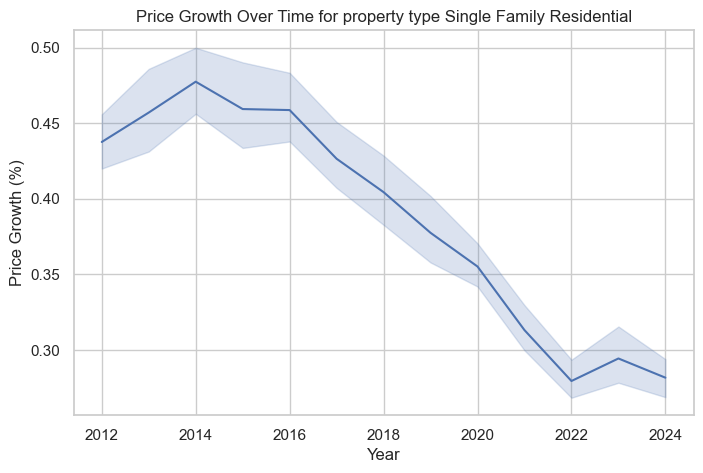

In [31]:
# How does price growth compare across different property types?
property_types = ['property_type_All Residential', 'property_type_Single Family Residential']

# Calculate median price growth for each property type
for prop_type in property_types:
    df_filtered = df[df[prop_type] == 1]
    plt.figure(figsize=(8, 5))
    sns.lineplot(x='year', y='price_growth', data=df_filtered)
    plt.title(f'Price Growth Over Time for {prop_type.replace("_", " ")}')
    plt.ylabel('Price Growth (%)')
    plt.xlabel('Year')
    plt.savefig(f'/Users/jordonez/Desktop/Brainstation/CapstoneRepo/src/images/price-growth-{prop_type}.png')
    plt.show()


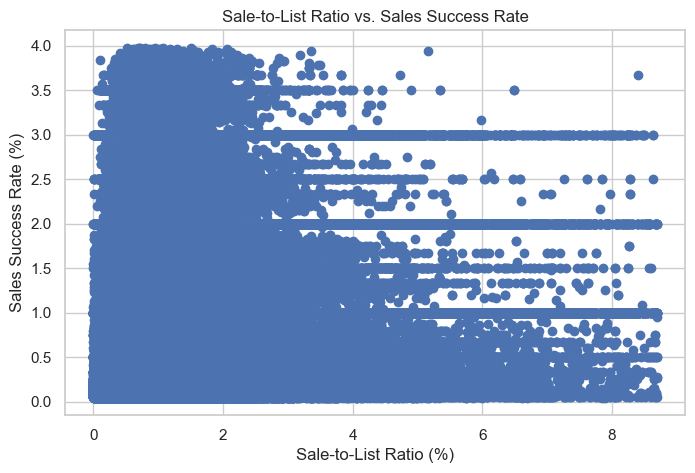

In [25]:
# How does the sale-to-list ratio impact sales success rate?
# Scatter plot to compare sale-to-list ratio and sales success rate
plt.figure(figsize=(8, 5))
plt.scatter(df['sale_to_list_ratio'], df['sales_success_rate'])
plt.title('Sale-to-List Ratio vs. Sales Success Rate')
plt.xlabel('Sale-to-List Ratio (%)')
plt.ylabel('Sales Success Rate (%)')
plt.show()

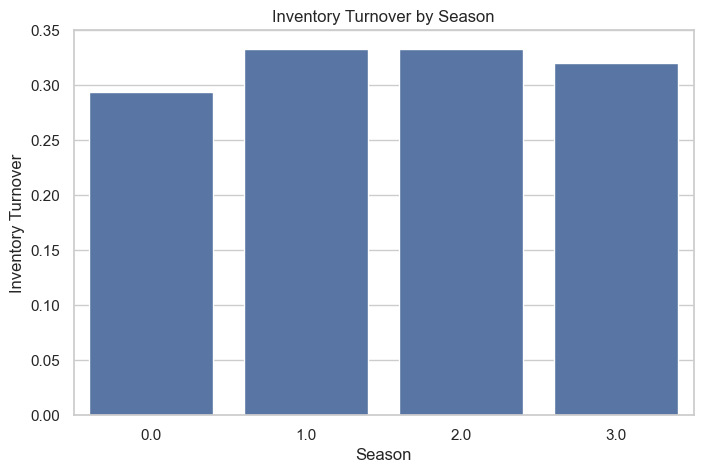

In [26]:
# How does inventory turnover vary by season?
# Group by season and calculate the median inventory turnover for each season
seasonal_turnover = df.groupby('season')['inventory_turnover'].median().reset_index()

# Plot the inventory turnover across seasons
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='inventory_turnover', data=seasonal_turnover)
plt.title('Inventory Turnover by Season')
plt.ylabel('Inventory Turnover')
plt.xlabel('Season')
plt.show()


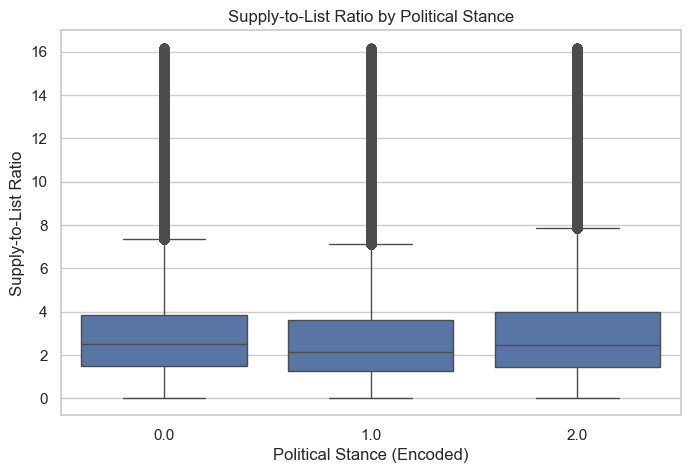

In [27]:
#  How does political stance influence supply-to-list ratio?
# Boxplot of supply-to-list ratio based on political stance
plt.figure(figsize=(8, 5))
sns.boxplot(x='political_stance_encoded', y='supply_to_list_ratio', data=df)
plt.title('Supply-to-List Ratio by Political Stance')
plt.xlabel('Political Stance (Encoded)')
plt.ylabel('Supply-to-List Ratio')
plt.show()

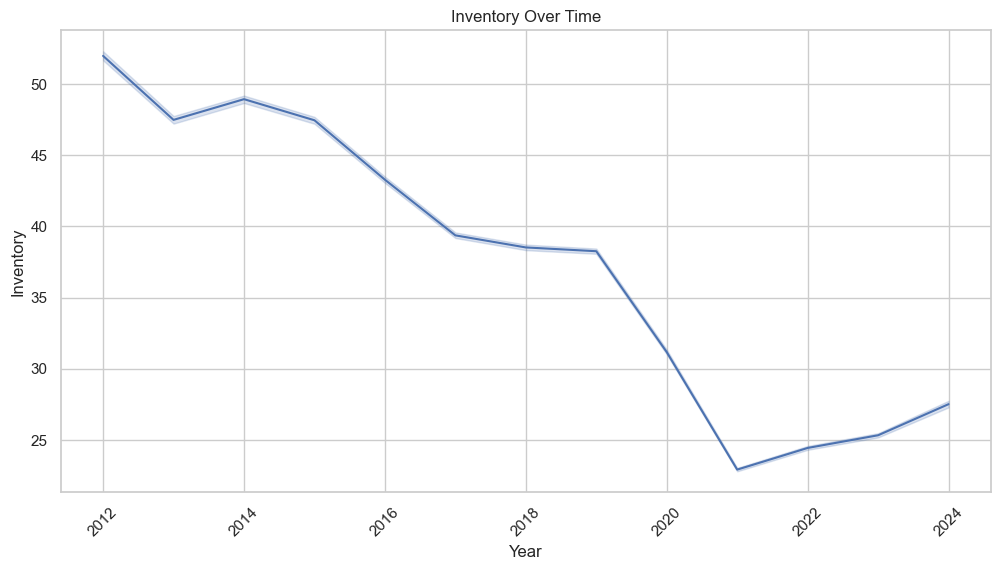

In [32]:
# How do housing market dynamics (inventory, price growth, and supply-to-list ratio) interact across different time periods?
# Plot multiple metrics over time to show interactions
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='inventory', data=df)
plt.title('Inventory Over Time')
plt.xlabel('Year')
plt.ylabel('Inventory')
plt.xticks(rotation=45)
plt.savefig('/Users/jordonez/Desktop/Brainstation/CapstoneRepo/src/images/inventory.png')
plt.show()

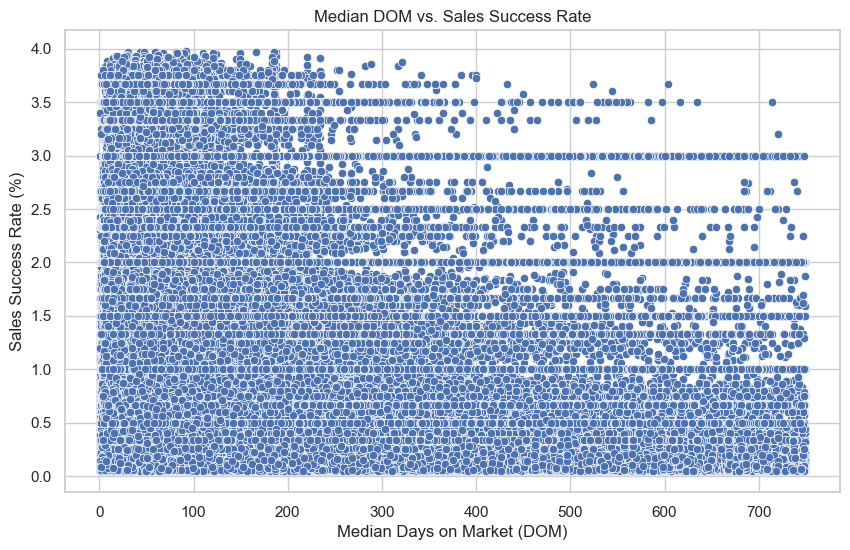

In [35]:
#  How does sales success rate change with the median days on market (DOM)?
# Scatter plot of median DOM vs. sales success rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_dom', y='sales_success_rate', data=df)
plt.title('Median DOM vs. Sales Success Rate')
plt.xlabel('Median Days on Market (DOM)')
plt.ylabel('Sales Success Rate (%)')
plt.savefig('/Users/jordonez/Desktop/Brainstation/CapstoneRepo/src/images/dom-sale-success-rate.png')
plt.show()

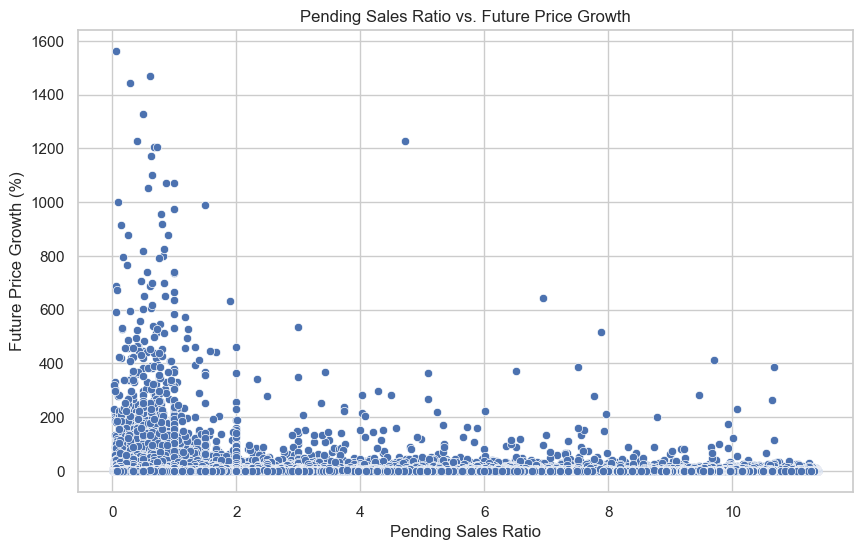

In [37]:
# How does pending sales ratio affect future price growth?
# Calculate lagged price growth (shift the price growth column by 1 period)
df['future_price_growth'] = df['price_growth'].shift(-1)

# Scatter plot of pending sales ratio vs. future price growth
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pending_sales_ratio', y='future_price_growth', data=df)
plt.title('Pending Sales Ratio vs. Future Price Growth')
plt.xlabel('Pending Sales Ratio')
plt.ylabel('Future Price Growth (%)')
plt.savefig('/Users/jordonez/Desktop/Brainstation/CapstoneRepo/src/images/pending-sales-price-growth.png')
plt.show()


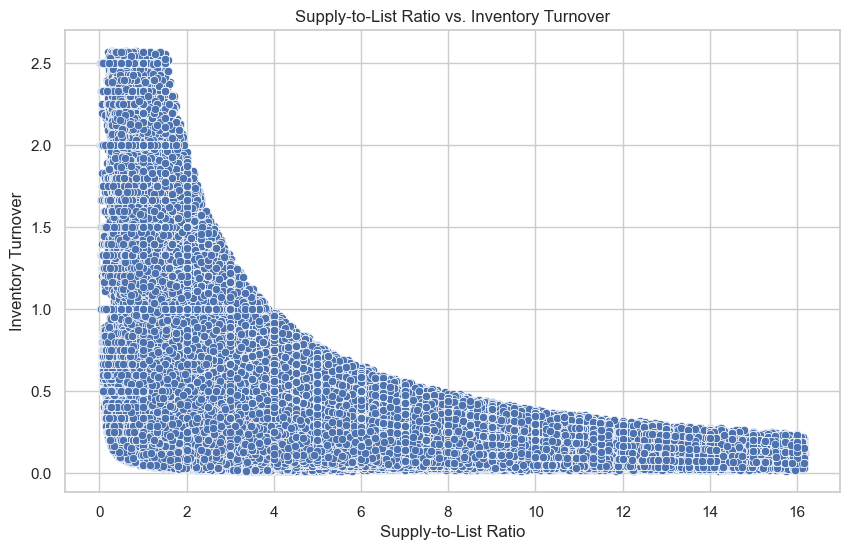

In [39]:
# How does supply-to-list ratio influence inventory turnover?
# Scatter plot of supply-to-list ratio vs. inventory turnover
plt.figure(figsize=(10, 6))
sns.scatterplot(x='supply_to_list_ratio', y='inventory_turnover', data=df)
plt.title('Supply-to-List Ratio vs. Inventory Turnover')
plt.xlabel('Supply-to-List Ratio')
plt.ylabel('Inventory Turnover')
plt.savefig('/Users/jordonez/Desktop/Brainstation/CapstoneRepo/src/images/supply-list-inventory-turnover.png')
plt.show()

In [40]:
df.columns

Index(['median_sale_price', 'median_list_price', 'median_ppsf',
       'median_list_ppsf', 'homes_sold', 'inventory', 'months_of_supply',
       'median_dom', 'year', 'month', 'season', 'sale_to_list_ratio',
       'price_growth', 'buyer_utility', 'pending_sales_ratio',
       'sales_success_rate', 'inventory_turnover', 'adjusted_months_supply',
       'political_stance_encoded', 'supply_to_list_ratio',
       'property_type_All Residential',
       'property_type_Single Family Residential', 'state_avg_sale_price',
       'metro_region_inventory_change', 'inventory_to_pending_ratio',
       'rolling_median_sale_price', 'rolling_median_list_price',
       'price_momentum', 'supply_pressure', 'demand_pressure',
       'price_elasticity', 'us_region_East North Central',
       'us_region_Mid-Atlantic', 'us_region_Pacific',
       'us_region_South Atlantic', 'future_price_growth'],
      dtype='object')

In [ ]:
# Create a new column to identify the region
df['region'] = df[['us_region_East North Central', 'us_region_Mid-Atlantic', 'us_region_Pacific', 'us_region_South Atlantic']].idxmax(axis=1)

# Map column names to readable region names
region_map = {
    'us_region_East North Central': 'East North Central',
    'us_region_Mid-Atlantic': 'Mid-Atlantic',
    'us_region_Pacific': 'Pacific',
    'us_region_South Atlantic': 'South Atlantic'
}
df['region'] = df['region'].map(region_map)

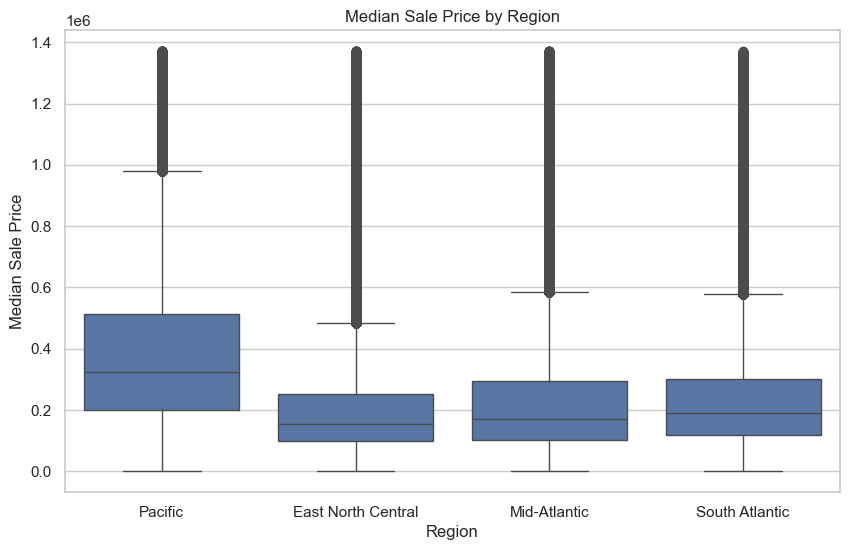

In [42]:
# Plot the median sale price by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='median_sale_price', data=df)
plt.title('Median Sale Price by Region')
plt.xlabel('Region')
plt.ylabel('Median Sale Price')
plt.savefig('/Users/jordonez/Desktop/Brainstation/CapstoneRepo/src/images/median-sale-price-by-region.png')
plt.show()

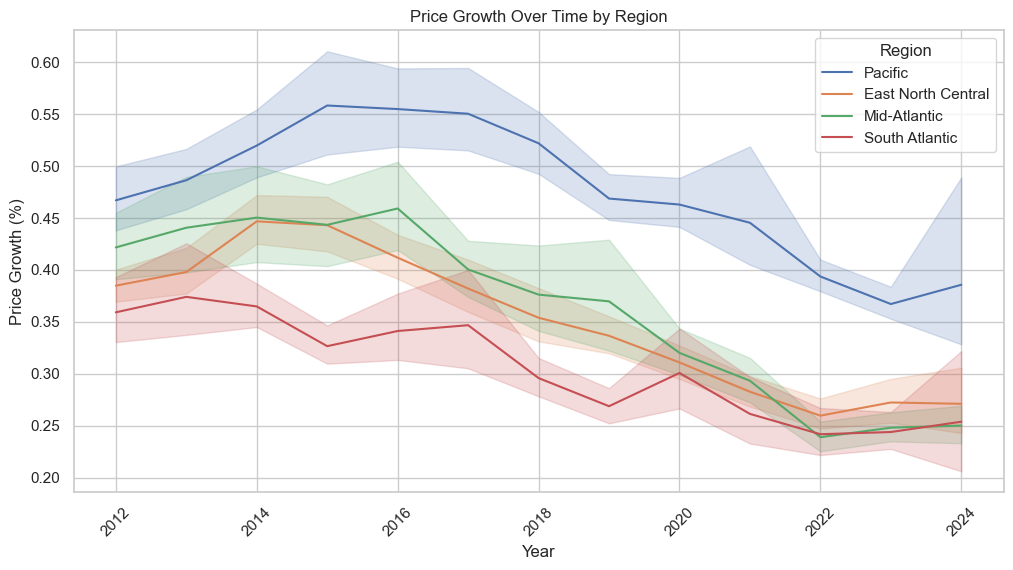

In [44]:
# What is the trend of price growth across different regions over time?
# Plot price growth over time for each region
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price_growth', hue='region', data=df)
plt.title('Price Growth Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Price Growth (%)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.savefig('/Users/jordonez/Desktop/Brainstation/CapstoneRepo/src/images/price-growth-over-time.png')
plt.show()

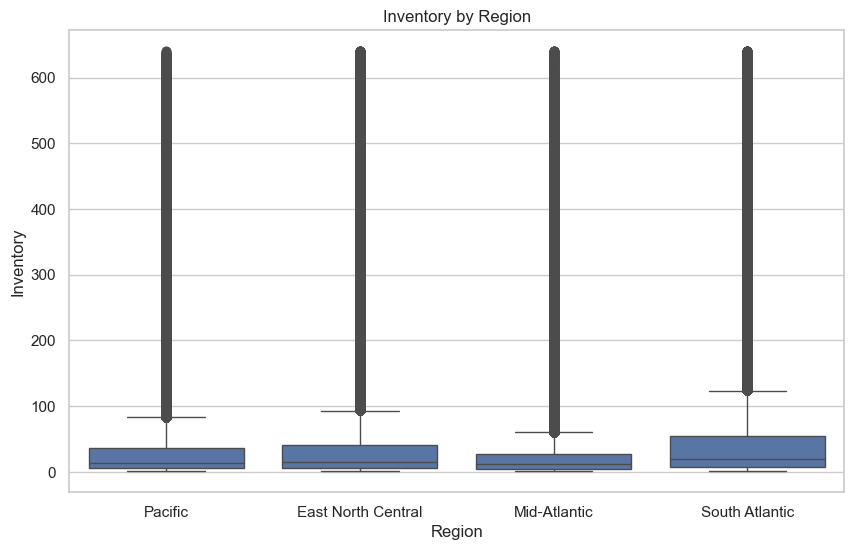

In [45]:
# How does inventory vary across regions?
# Plot inventory across regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='inventory', data=df)
plt.title('Inventory by Region')
plt.xlabel('Region')
plt.ylabel('Inventory')
plt.savefig('/Users/jordonez/Desktop/Brainstation/CapstoneRepo/src/images/inventory-by-regions.png')
plt.show()

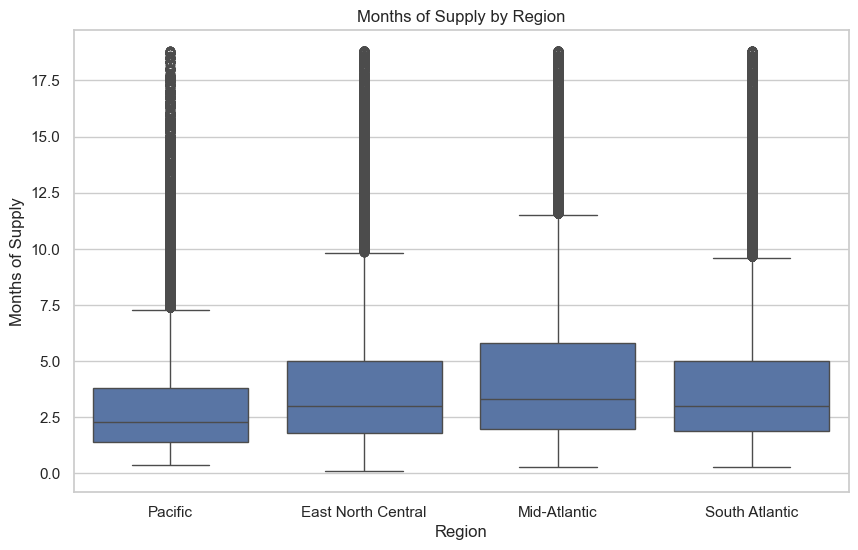

In [46]:
# How does months of supply differ across regions?
# Plot months of supply across regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='months_of_supply', data=df)
plt.title('Months of Supply by Region')
plt.xlabel('Region')
plt.ylabel('Months of Supply')
plt.savefig('/Users/jordonez/Desktop/Brainstation/CapstoneRepo/src/images/months-supply-by-regions.png')
plt.show()

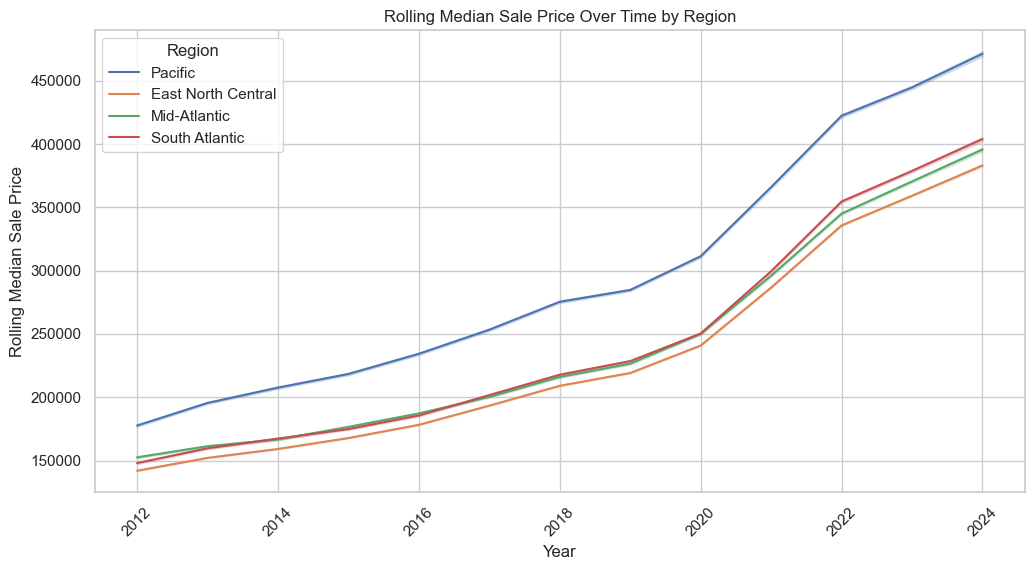

In [50]:
# How do rolling median sale prices differ by region over time?
# Plot rolling median sale price over time for each region
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rolling_median_sale_price', hue='region', data=df)
plt.title('Rolling Median Sale Price Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Rolling Median Sale Price')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.savefig('/Users/jordonez/Desktop/Brainstation/CapstoneRepo/src/images/rolling-median-sale-price-over-time-by-regions.png')
plt.show()

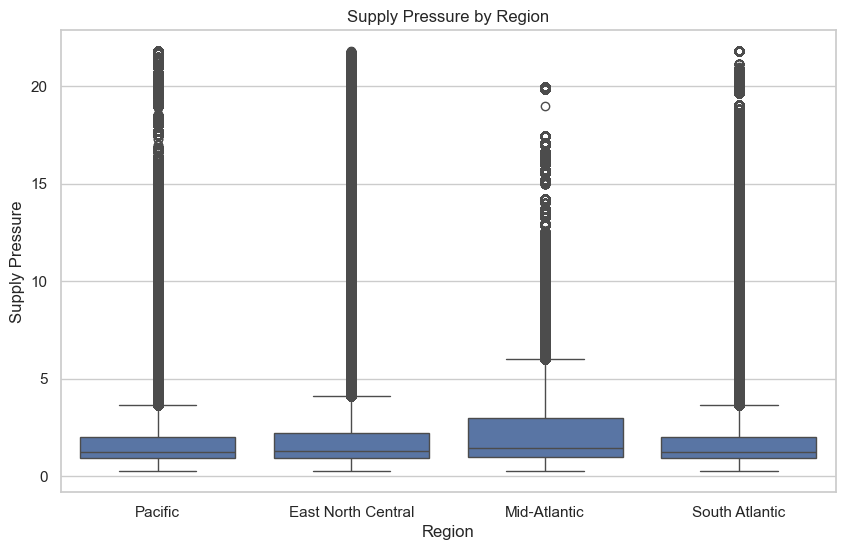

In [51]:
# How does supply pressure differ across regions?
# Plot supply pressure across regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='supply_pressure', data=df)
plt.title('Supply Pressure by Region')
plt.xlabel('Region')
plt.ylabel('Supply Pressure')
plt.savefig('/Users/jordonez/Desktop/Brainstation/CapstoneRepo/src/images/supply-pressure-over-time-by-regions.png')
plt.show()

In [52]:
df.columns

Index(['median_sale_price', 'median_list_price', 'median_ppsf',
       'median_list_ppsf', 'homes_sold', 'inventory', 'months_of_supply',
       'median_dom', 'year', 'month', 'season', 'sale_to_list_ratio',
       'price_growth', 'buyer_utility', 'pending_sales_ratio',
       'sales_success_rate', 'inventory_turnover', 'adjusted_months_supply',
       'political_stance_encoded', 'supply_to_list_ratio',
       'property_type_All Residential',
       'property_type_Single Family Residential', 'state_avg_sale_price',
       'metro_region_inventory_change', 'inventory_to_pending_ratio',
       'rolling_median_sale_price', 'rolling_median_list_price',
       'price_momentum', 'supply_pressure', 'demand_pressure',
       'price_elasticity', 'us_region_East North Central',
       'us_region_Mid-Atlantic', 'us_region_Pacific',
       'us_region_South Atlantic', 'future_price_growth', 'region'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4529592 entries, 0 to 4529591
Data columns (total 37 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   median_sale_price                        float64
 1   median_list_price                        float64
 2   median_ppsf                              float64
 3   median_list_ppsf                         float64
 4   homes_sold                               float64
 5   inventory                                float64
 6   months_of_supply                         float64
 7   median_dom                               float64
 8   year                                     float64
 9   month                                    float64
 10  season                                   float64
 11  sale_to_list_ratio                       float64
 12  price_growth                             float64
 13  buyer_utility                            float64
 14  pending_sales_rati